In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('../'))
sys.path.insert(0, os.path.abspath('../../'))


import numpy as np
from scipy.optimize import minimize
import networkx as nx

import qiskit 
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator
from qiskit.algorithms import QAOA
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from shared.QiskitMaxcut import *
from qiskit.utils import QuantumInstance
from qiskit.result import Result
from qiskit.converters import circuit_to_dag, dag_to_circuit
from qiskit.algorithms.optimizers import SPSA, COBYLA, QNSPSA


# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()
provider = qiskit.IBMQ.get_provider(hub='ibm-q-unibw', group='hochschule-muc', project='masterarbeit')
# https://arxiv.org/pdf/2011.10860.pdf

In [2]:
from shared.graph_helper import load_nx_graph_from, generate_butterfly_graph

In [3]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.ignis.mitigation.measurement import CompleteMeasFitter

noise_backend = provider.get_backend("ibmq_toronto")
noise_model = NoiseModel.from_backend(noise_backend)
coupling_map = noise_backend.configuration().coupling_map
basis_gates = noise_model.basis_gates

In [4]:
import sys
import os
sys.path.insert(0, os.path.abspath('../'))
sys.path.insert(0, os.path.abspath('../../'))
sys.path.insert(0, os.path.abspath('/home/hm-tlacherm/qlm_notebooks/notebooks_1.2.1/notebooks/master_thesis_qaoa/'))
sys.path.insert(0, os.path.abspath('/home/hm-tlacherm/qlm_notebooks/notebooks_1.2.1/notebooks/master_thesis_qaoa/ibm/'))
sys.path.insert(0, os.path.abspath('/home/hm-tlacherm/qlm_notebooks/notebooks_1.2.1/notebooks/master_thesis_qaoa/ibm/landscape/'))
sys.path.insert(0, os.path.abspath('/home/hm-tlacherm/qlm_notebooks/notebooks_1.2.1/notebooks/master_thesis_qaoa/ibm/landscape/simulator/'))

In [5]:
from shared.gem.gem_instance import GEMInstance
from shared.gem.gem_quantum_instance import GEMQuantumInstance
from shared.gem.gem_minimum_eigen_optimizer import GEMMinimumEigenOptimizer

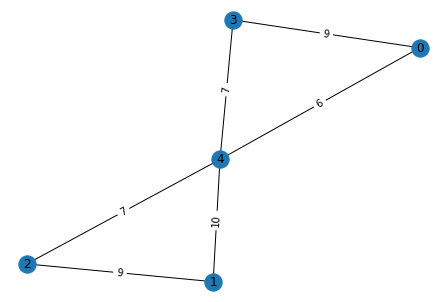

In [6]:
G = generate_butterfly_graph()
max_cut = Maxcut(G,-35)
max_cut.draw()
qubo = max_cut.to_qubo()

In [7]:
# Minimum 
initial_point=[ -3.33412359,  5.45892711]

In [8]:
maxiter=0
shots=8192

# Simulator 

In [9]:
gem = GEMInstance()

In [10]:
%matplotlib inline

def my_plot_histogram(distribution, mean):
    from matplotlib.ticker import FixedLocator, FixedFormatter
    from qiskit.tools.visualization import plot_histogram
    fig = plot_histogram(distribution, title=f"Max-Cut Distribution (Ø: {mean:.3f})", bar_labels=False)
    ax = fig.axes[0]
    x_locator = FixedLocator([0, len(distribution.keys())//2, len(distribution.keys())])
    x_formatter = FixedFormatter([
        ""+str(min(distribution.keys())), ""+str(list(distribution.keys())[len(distribution.keys())//2]), ""+str(max(distribution.keys()))])
    ax.xaxis.set_major_locator(x_locator)
    ax.xaxis.set_major_formatter(x_formatter)
    plt.show()
    return fig

optimal function value: -35.0
optimal value: [0. 1. 0. 1. 0.]
status: SUCCESS
Number of samples (30) is too large to display. Skip.
Expectation Value: -32.31751700527171
Highest Exp.Value: 0 with 0.04525 %
Lowest Exp.Value: -35 with 24.371000000000002 %
Highest Probability: -32 with 25.81 %
Ratio r: 0.9233576287220489
Approiximation ratio: 0.9233576287220489
MSE: 170.9389972970149
RMSE: 13.07436412591507


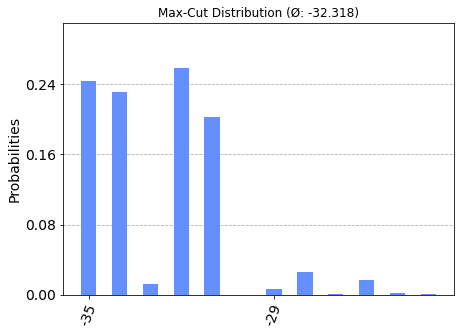

In [11]:
# QAOA with GEM
qiGME = GEMQuantumInstance(backend=Aer.get_backend('qasm_simulator'), shots=shots)
qaoa = QAOA(quantum_instance=qiGME, initial_point=initial_point, optimizer=COBYLA(maxiter=maxiter))

result = GEMMinimumEigenOptimizer(qaoa,gem).solve(qubo)
mean, distribution_noise_gem_sim = max_cut.analyse(result, print_output=True)
my_plot_histogram(distribution_noise_gem_sim, mean)

In [12]:
# print MG-Matrix 
qiGME.MG

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

optimal function value: -35.0
optimal value: [0. 1. 0. 1. 0.]
status: SUCCESS
Number of samples (28) is too large to display. Skip.
Expectation Value: -32.393310546875
Highest Exp.Value: 0 with 0.012207 %
Lowest Exp.Value: -35 with 24.89 %
Highest Probability: -32 with 25.537 %
Ratio r: 0.9255231584821428
Approiximation ratio: 0.9255231584821428
MSE: 172.16767332951227
RMSE: 13.12126797720069


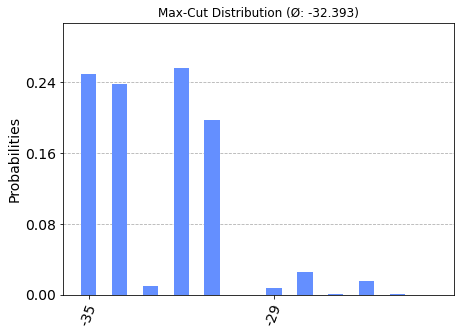

In [13]:
# Normal QAOA 
qi = QuantumInstance(backend=Aer.get_backend('qasm_simulator'), shots=shots)
qaoa = QAOA(quantum_instance=qi, initial_point=initial_point, optimizer=COBYLA(maxiter=maxiter))
algorithm = MinimumEigenOptimizer(qaoa)
result = algorithm.solve(qubo)
mean, distribution_sim = max_cut.analyse(result, print_output=True)
my_plot_histogram(distribution_sim, mean)

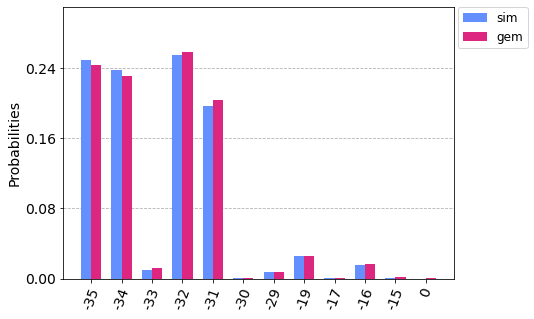

In [14]:
from qiskit.tools.visualization import plot_histogram
plot_histogram([distribution_sim, distribution_noise_gem_sim], legend=['sim','gem'], bar_labels=False)

# IBM Sydney 

## GEM

In [15]:
gem = GEMInstance()

optimal function value: -35.0
optimal value: [0. 1. 0. 1. 0.]
status: SUCCESS
Number of samples (22) is too large to display. Skip.
Expectation Value: -30.07325455716531
Highest Exp.Value: 0 with 0.28383 %
Lowest Exp.Value: -35 with 15.371000000000002 %
Highest Probability: -34 with 23.968 %
Ratio r: 0.8592358444904374
Approiximation ratio: 0.8592358444904374
MSE: 144.99651544753084
RMSE: 12.041449889757082


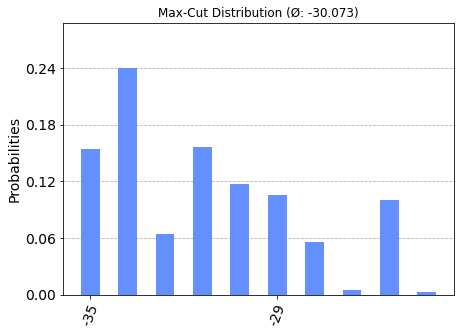

In [16]:
# QAOA with GEM
qiGME = GEMQuantumInstance(backend=provider.get_backend('ibmq_sydney'), shots=shots)
qaoa = QAOA(quantum_instance=qiGME, initial_point=initial_point, optimizer=COBYLA(maxiter=maxiter))

result = GEMMinimumEigenOptimizer(qaoa, gem).solve(qubo)
mean_gem, distribution_gem = max_cut.analyse(result, print_output=True)
my_plot_histogram(distribution_gem, mean_gem)

In [17]:
# print MG-Matrix 
qiGME.MG

array([[0.61273193, 0.04541016, 0.06982422, ..., 0.00341797, 0.00262451,
        0.00299072],
       [0.03692627, 0.59472656, 0.02008057, ..., 0.00286865, 0.0032959 ,
        0.00323486],
       [0.09899902, 0.02270508, 0.51513672, ..., 0.00354004, 0.0043335 ,
        0.00323486],
       ...,
       [0.00427246, 0.00292969, 0.0043335 , ..., 0.57537842, 0.02197266,
        0.10784912],
       [0.00390625, 0.00341797, 0.00750732, ..., 0.01879883, 0.56140137,
        0.04309082],
       [0.00390625, 0.00469971, 0.00524902, ..., 0.09387207, 0.03149414,
        0.55010986]])

## EM

In [18]:
qiEM = QuantumInstance(backend=provider.get_backend('ibmq_sydney'),
                     measurement_error_mitigation_cls=CompleteMeasFitter,
                     measurement_error_mitigation_shots=shots,
                     shots=shots,
                     )

optimal function value: -35.0
optimal value: [0. 1. 0. 1. 0.]
status: SUCCESS
Number of samples (32) is too large to display. Skip.
Expectation Value: -27.941648320616963
Highest Exp.Value: 0 with 1.9435999999999998 %
Lowest Exp.Value: -35 with 12.362 %
Highest Probability: -32 with 18.45 %
Ratio r: 0.7983328091604847
Approiximation ratio: 0.7983328091604847
MSE: 127.46477403187416
RMSE: 11.290029850796417


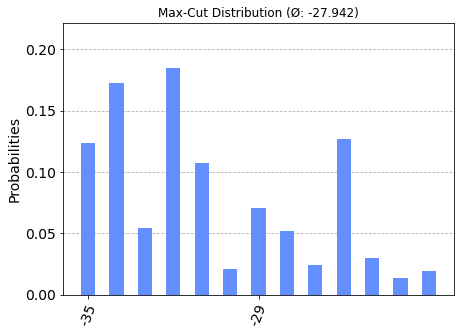

In [19]:
qaoa = QAOA(quantum_instance=qiEM, initial_point=initial_point, optimizer=COBYLA(maxiter=maxiter))
algorithm = MinimumEigenOptimizer(qaoa)
result = algorithm.solve(qubo)
mean_em, distribution_em = max_cut.analyse(result, print_output=True)
my_plot_histogram(distribution_em, mean_em)

In [20]:
## # Without any Error mitigation

optimal function value: -35.0
optimal value: [0. 1. 0. 1. 0.]
status: SUCCESS
Number of samples (32) is too large to display. Skip.
Expectation Value: -27.578125
Highest Exp.Value: 0 with 2.6245000000000003 %
Lowest Exp.Value: -35 with 12.402000000000001 %
Highest Probability: -32 with 18.799 %
Ratio r: 0.7879464285714286
Approiximation ratio: 0.7879464285714286
MSE: 124.28374774639423
RMSE: 11.148262095339984


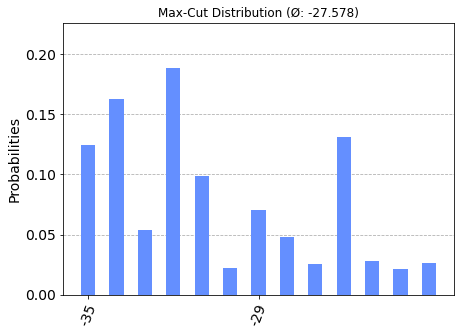

In [21]:
qi = QuantumInstance(backend=provider.get_backend('ibmq_sydney'),
                     shots=shots,
                     )
qaoa = QAOA(quantum_instance=qi, initial_point=initial_point, optimizer=COBYLA(maxiter=maxiter))
algorithm = MinimumEigenOptimizer(qaoa)
result = algorithm.solve(qubo)
mean_noise, distribution_noise = max_cut.analyse(result, print_output=True)
my_plot_histogram(distribution_noise, mean_noise)

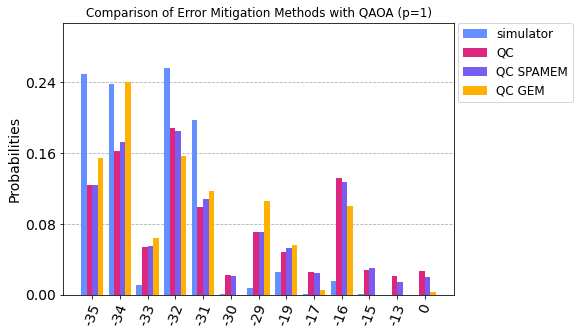

In [22]:
from qiskit.tools.visualization import plot_histogram
plot_histogram([distribution_sim, distribution_noise, distribution_em, distribution_gem],
               title=f"Comparison of Error Mitigation Methods with QAOA (p=1)",
               legend=['simulator','QC', 'QC SPAMEM','QC GEM'], bar_labels=False)    



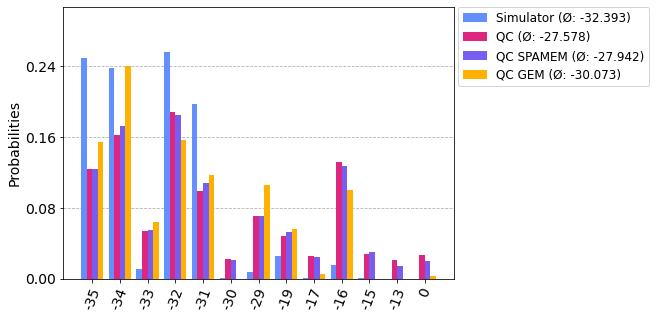

In [23]:
from qiskit.tools.visualization import plot_histogram
plot_histogram([distribution_sim, distribution_noise, distribution_em, distribution_gem],
               legend=[f'Simulator (Ø: {mean:.3f})',f'QC (Ø: {mean_noise:.3f})', f'QC SPAMEM (Ø: {mean_em:.3f})',f'QC GEM (Ø: {mean_gem:.3f})'], bar_labels=False)   

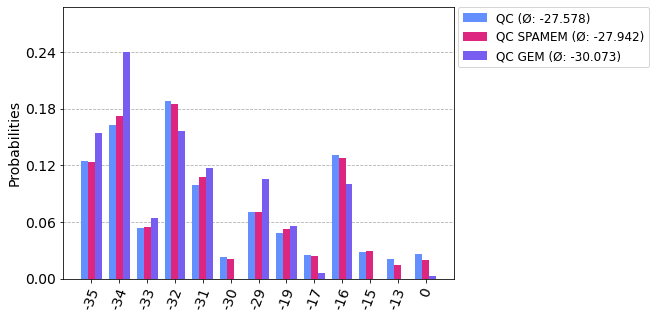

In [24]:
from qiskit.tools.visualization import plot_histogram
plot_histogram([distribution_noise, distribution_em, distribution_gem],
               legend=[f'QC (Ø: {mean_noise:.3f})', f'QC SPAMEM (Ø: {mean_em:.3f})',f'QC GEM (Ø: {mean_gem:.3f})'], bar_labels=False)   

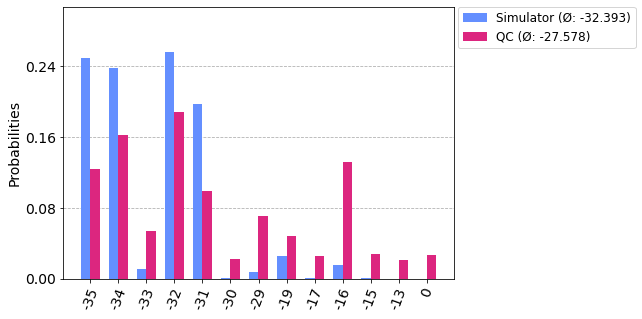

In [25]:
from qiskit.tools.visualization import plot_histogram
plot_histogram([distribution_sim, distribution_noise],
               legend=[f'Simulator (Ø: {mean:.3f})',f'QC (Ø: {mean_noise:.3f})'], bar_labels=False)   

In [29]:
abs( mean_noise / mean - 1 ) * 100 

14.864752831937778

In [30]:
abs(mean_em / mean - 1 ) * 100 

13.742535576338277

In [31]:
abs(mean_gem / mean - 1 ) * 100 

7.162145364403038